# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(xx,n):
    top = 1
    bottom = 1
    interp = 0
    for i in range(n):
        for j in range(n):
            if j != i:
                top*=(xx-x[j])
        for j in range(n):
            if j != i:
                bottom*=x[i]-x[j]
        interp += fx[i]*top/bottom
        top = 1
        bottom = 1
    return interp



<IPython.core.display.Javascript object>


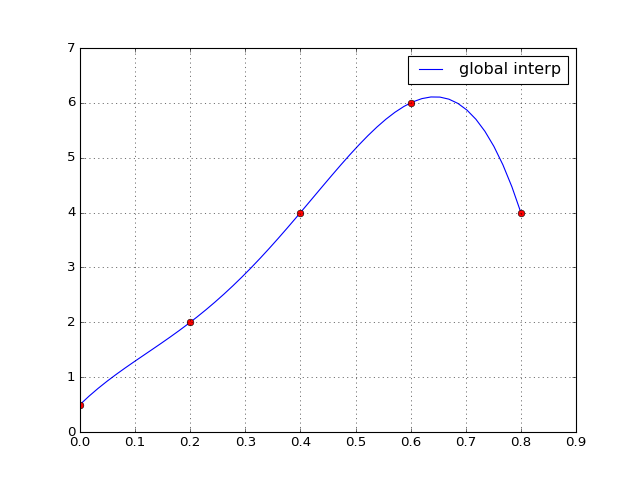

In [22]:
%matplotlib notebook
x = [0,0.2,0.4,0.6,0.8]
fx = [0.5,2,4,6,4]

order = 5
num = 50

xr = np.linspace(x[0],x[-1],num)
yr = f(xr,order)


plt.plot(xr,yr,label='global interp')
plt.plot(x,fx,'ro')
plt.grid()
plt.legend(loc='best')

# Q3

In [27]:
import numpy as np
import sys
import time
from scipy import interpolate
from PyQt5 import uic, QtWidgets
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import (
    FigureCanvasQTAgg as FigureCanvas,
    NavigationToolbar2QT as NavigationToolbar)
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
qtCreatorFile = "interp_plotting.ui" # Enter file here.

Ui_MainWindow, QtBaseClass = uic.loadUiType(qtCreatorFile)

class Main(QtWidgets.QMainWindow, Ui_MainWindow):
    def __init__(self):
        QtWidgets.QMainWindow.__init__(self)
        Ui_MainWindow.__init__(self)
        self.setupUi(self)
        self.LoadData.clicked.connect(self.loadData)
        self.StartInterp.clicked.connect(self.startInterp)
        
        #Notice that an empty figure instance was added to our plotting window in the initialization method. 
        #This is necessary because our first call to changefig will try to remove a previously displayed figure,
        #which will throw an error if one is not displayed. 
        #The empty figure serves as a placeholder so the changefig method functions properly.
        fig = Figure()
        self.addmpl_1(fig)

        
       
    def addmpl_1(self, fig):
        self.canvas = FigureCanvas(fig)
        self.mplvl_1.addWidget(self.canvas)
        self.canvas.draw()
        self.toolbar = NavigationToolbar(self.canvas, 
                self.mplwindow_1, coordinates=True)
        self.mplvl_1.addWidget(self.toolbar)
               
    def rmmpl_1(self):
        self.mplvl_1.removeWidget(self.canvas)
        self.canvas.close()
        self.mplvl_1.removeWidget(self.toolbar)
        self.toolbar.close()
        
    def loadData(self):
        data = np.loadtxt("spline.dat")
        x = data[:,0]
        fx = data[:,1]
        
        figx = Figure()
        ax1f1 = figx.add_subplot(111)
        ax1f1.set_title('xplot')
        ax1f1.plot(x,fx,'ro',label='data points')
        
        ax1f1.set_xlabel('x')
        ax1f1.set_ylabel('y')
        ax1f1.grid()
        self.rmmpl_1()
        self.addmpl_1(figx)
        
    def startInterp(self):
        
        data = np.loadtxt("spline.dat")
        x = data[:,0]
        fx = data[:,1]
        
        num = int(self.num_points.toPlainText())
        xr = np.linspace(x[0],x[-1],num)
        yr = self.globalInterp(xr,x,fx)
        yr2 = self.localInterp(xr,x,fx)
        tck = interpolate.splrep(x,fx)
        yr3 = interpolate.splev(xr,tck)
        
        figx = Figure()
        ax1f1 = figx.add_subplot(111)
        ax1f1.set_title('xplot')
        ax1f1.plot(x,fx,'ro',label='data points')
        if self.Ginterp.checkState() > 0:
            ax1f1.plot(xr,yr,label='global interp')
        if self.Linterp.checkState() > 0:
            ax1f1.plot(xr,yr2,label='local interp')
        if self.Bspline.checkState() > 0:     
            ax1f1.plot(xr,yr3,label='scipy interp')
        
        ax1f1.set_xlabel('x')
        ax1f1.set_ylabel('y')
        ax1f1.grid()
        ax1f1.legend(loc='best')
        self.rmmpl_1()
        self.addmpl_1(figx)
        

        
    def globalInterp(self,xx,xi,fxi):
        xx = np.array(xx)
        interp = np.zeros_like(xx)

        for k in np.ndindex(xx.shape):
            for i in range(len(xi)):
                top=1
                bottom=1

                for j in range(len(xi)):
                    if j!=i:
                        top*=(xx[k]-xi[j])
                for j in range(len(xi)):
                    if j!=i:
                        bottom*=xi[i]-xi[j]
                interp[k] += fxi[i]*top/bottom
        return interp

    def localInterp(self,xx,xi,fxi):
        lower = 0
        higher = 1
        xx = np.array(xx)

        interp = np.empty_like(xx)

        for j in np.ndindex(xx.shape):
            for i in range(len(xi)-1):
                if xi[i]<xx[j] and xx[j]<xi[i+1]:
                    lower=i
                    higher=i+1
            interp[j] = fxi[lower]*(xx[j]-xi[higher])/(xi[lower]-xi[higher]
                            ) + fxi[higher]*(xx[j]-xi[lower])/(xi[higher]-xi[lower])
        return interp
    
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    app.aboutToQuit.connect(app.deleteLater)
    window = Main()
    window.show()
    app.exec_()

8
9
10


In [23]:
from scipy import interpolate

def globalInterp(xx,xi,fxi):
    xx = np.array(xx)
    interp = np.zeros_like(xx)
    
    for k in np.ndindex(xx.shape):
        for i in range(len(xi)):
            top=1
            bottom=1
            
            for j in range(len(xi)):
                if j!=i:
                    top*=(xx[k]-xi[j])
            for j in range(len(xi)):
                if j!=i:
                    bottom*=xi[i]-xi[j]
            interp[k] += fxi[i]*top/bottom
    return interp

def localInterp(xx,xi,fxi):
    lower = 0
    higher = 1
    xx = np.array(xx)
    
    interp = np.empty_like(xx)
    
    for j in np.ndindex(xx.shape):
        for i in range(len(xi)-1):
            if xi[i]<xx[j] and xx[j]<xi[i+1]:
                lower=i
                higher=i+1
        interp[j] = fxi[lower]*(xx[j]-xi[higher])/(xi[lower]-xi[higher]
                        ) + fxi[higher]*(xx[j]-xi[lower])/(xi[higher]-xi[lower])
    return interp
    

<IPython.core.display.Javascript object>


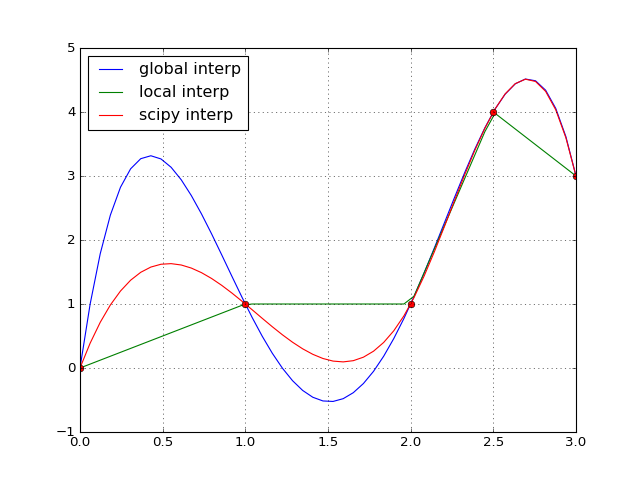

In [24]:
%matplotlib notebook
x = [0,1.0,2.0,2.5,3.0]
fx = [0,1.0,1.0,4.0,3.0]



order = 5
num = 50

xr = np.linspace(x[0],x[-1],num)
yr = globalInterp(xr,x,fx)
yr2 = localInterp(xr,x,fx)
tck = interpolate.splrep(x,fx)
yr3 = interpolate.splev(xr,tck)


plt.plot(xr,yr,label='global interp')
plt.plot(xr,yr2,label='local interp')
plt.plot(xr,yr3,label='scipy interp')
plt.plot(x,fx,'ro')
plt.grid()
plt.legend(loc='best')

In [4]:
data = np.loadtxt("spline.dat")

In [5]:
x = data[:,0]
fx = data[:,1]

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4])